In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
df = pd.read_excel("data.xlsx",skiprows=[1])
df.drop(columns=[ 'Machine Code',   'Is Dawaa Insurance', 'Is Insurance Approval', 'Insurance Approval', 'Insurance Type', 'Nphies Action Type', 'Nphies Member Id', 'Nphies Payer Code', 'Nphies Auth Id', 'Gender', 'Nationality', 'Total Value', 'Discount Value','Vat Value', 'Gross Value', 'Supervisor', 'Senior', 'District', 'Region', 'POS Version'] , inplace=True)
print(df.head(10))

  Location  Receipt Number Order No  DeliveryNo  Trx Month   Trx Date  \
0    P0175          699855      NaN         NaN 2024-12-01 2024-12-01   
1    P0175          699856      NaN         NaN 2024-12-01 2024-12-01   
2    P0175          699857      NaN         NaN 2024-12-01 2024-12-01   
3    P0175          699858      NaN         NaN 2024-12-01 2024-12-01   
4    P0175          699860      NaN         NaN 2024-12-01 2024-12-01   
5    P0175          699862      NaN         NaN 2024-12-01 2024-12-01   
6    P0175          699864      NaN         NaN 2024-12-01 2024-12-01   
7    P0175          699866      NaN         NaN 2024-12-01 2024-12-01   
8    P0175          699869      NaN         NaN 2024-12-01 2024-12-01   
9    P0175          699872      NaN         NaN 2024-12-01 2024-12-01   

             Trx Time Trx Type Trx Status Document Type  ... Customer Name  \
0 1900-01-01 00:08:25    Sales      Paper       Regular  ...           NaN   
1 1900-01-01 00:11:21    Sales      Pape

In [ ]:
print(df.columns)

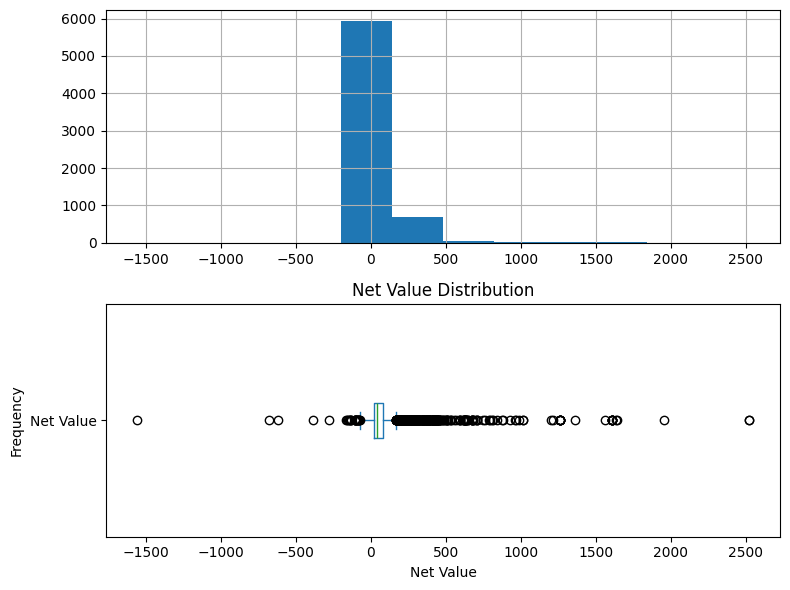

In [2]:
    fig,ax = plt.subplots(2,figsize=(8,6))
    df['Net Value'].hist(ax=ax[0],bins=12)
    plt.title("Net Value Distribution")
    plt.xlabel("Net Value")
    plt.ylabel("Frequency")
    
    df['Net Value'].plot.box(ax=ax[1],vert=False)
    plt.title("Net Value Distribution")
    plt.xlabel("Net Value")
    plt.ylabel("Frequency")
    fig.tight_layout()
    plt.show()


<Axes: >

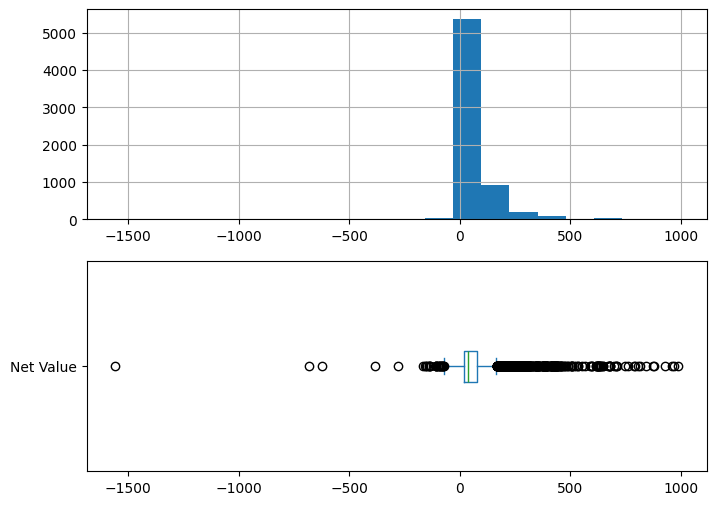

In [3]:
fig,ax = plt.subplots(2,figsize=(8,6))
df_filtered = df.loc[ df['Net Value'] < 1000].reset_index()
df_filtered['Net Value'].hist(ax=ax[0],bins=20)

df_filtered['Net Value'].plot.box(ax=ax[1],vert=False)

In [7]:
trx_date = df['Trx Date'][:10]
print(trx_date)

0   2024-12-01
1   2024-12-01
2   2024-12-01
3   2024-12-01
4   2024-12-01
5   2024-12-01
6   2024-12-01
7   2024-12-01
8   2024-12-01
9   2024-12-01
Name: Trx Date, dtype: datetime64[ns]


In [8]:
columns_names = df.columns
columns_dtpes = df.dtypes
print(columns_names.tolist())
print(columns_dtpes)

['Location', 'Receipt Number', 'Order No', 'DeliveryNo', 'Trx Month', 'Trx Date', 'Trx Time', 'Trx Type', 'Trx Status', 'Document Type', 'Sub Document Type', 'Staff ID', 'Staff Name', 'Staff Phone', 'Customer ID', 'Customer Name', 'Membership ID', 'Loyalty Customer ID', 'Loyalty Name', 'Loyalty Phone', 'Indirect Customer', 'Items', 'Item Lines Count', 'Payment Lines Count', 'Net Value']
Location                       object
Receipt Number                  int64
Order No                       object
DeliveryNo                    float64
Trx Month              datetime64[ns]
Trx Date               datetime64[ns]
Trx Time               datetime64[ns]
Trx Type                       object
Trx Status                     object
Document Type                  object
Sub Document Type              object
Staff ID                        int64
Staff Name                     object
Staff Phone                     int64
Customer ID                   float64
Customer Name                  object
Me

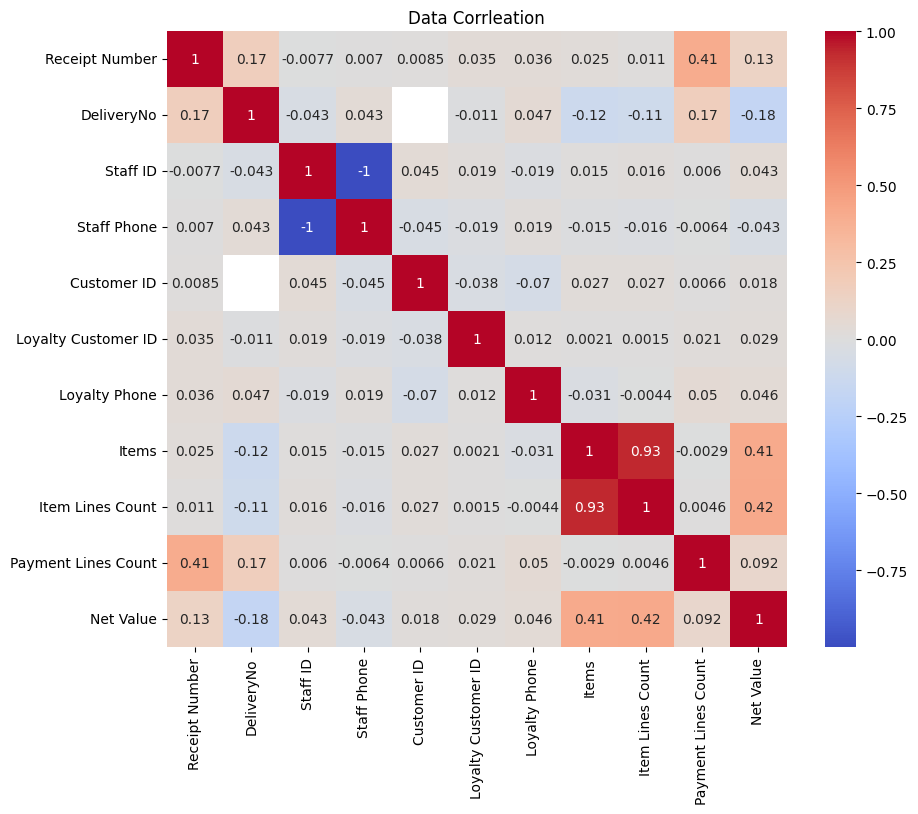

In [9]:
selected_columns = df.select_dtypes(include=['float64' , 'int64'])
df_corr = selected_columns.corr()

plt.figure(figsize=(10,8))
sns.heatmap(df_corr , annot = True, cmap='coolwarm')
plt.title("Data Corrleation")
plt.show()

/tmp/ipykernel_10960/3015898456.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, sales_merged['Net Value'][i] + 100, f"{sales_merged['Net Value'][i]:,.0f}", ha = 'center')


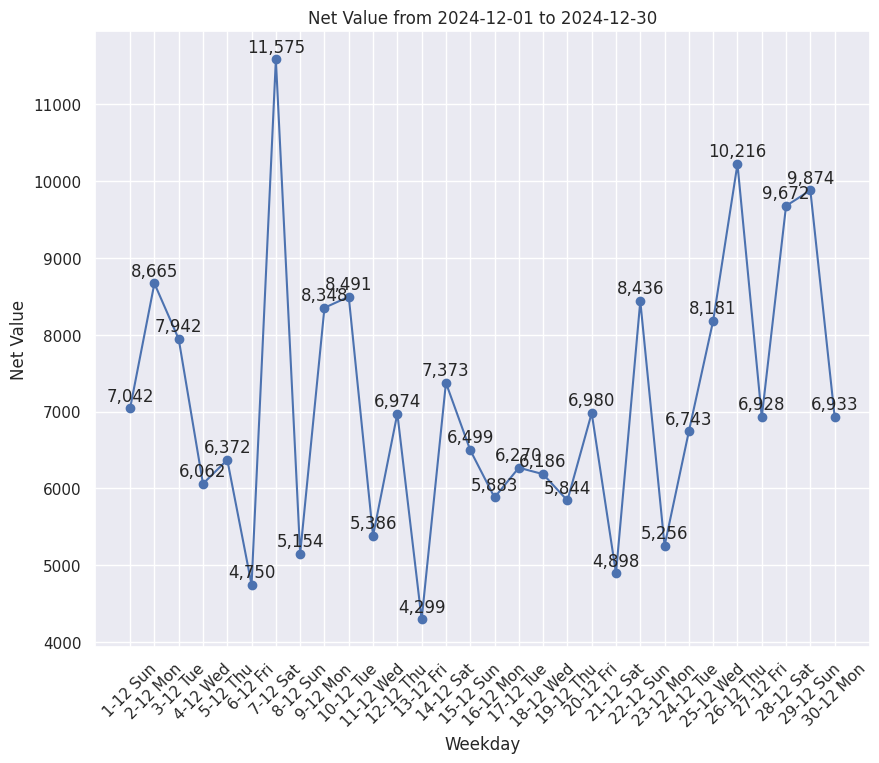

(Timestamp('2024-12-01 00:00:00'), Net Value       7042.23
Weekday Name     Sunday
Month                12
Day                   1
Name: 2024-12-01 00:00:00, dtype: object)
(Timestamp('2024-12-02 00:00:00'), Net Value       8665.02
Weekday Name     Monday
Month                12
Day                   2
Name: 2024-12-02 00:00:00, dtype: object)
(Timestamp('2024-12-03 00:00:00'), Net Value       7941.95
Weekday Name    Tuesday
Month                12
Day                   3
Name: 2024-12-03 00:00:00, dtype: object)
(Timestamp('2024-12-04 00:00:00'), Net Value         6061.86
Weekday Name    Wednesday
Month                  12
Day                     4
Name: 2024-12-04 00:00:00, dtype: object)
(Timestamp('2024-12-05 00:00:00'), Net Value         6372.4
Weekday Name    Thursday
Month                 12
Day                    5
Name: 2024-12-05 00:00:00, dtype: object)
(Timestamp('2024-12-06 00:00:00'), Net Value       4750.43
Weekday Name     Friday
Month                12
Day             

In [ ]:
# df = pd.read_csv('opsd_germany_daily.csv', index_col=0,
#                          parse_dates=True)

# # Add columns with year, month, and weekday name

import datetime


if  'Trx Date' in df.columns  :
    df = df.set_index('Trx Date')

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Weekday Name'] = df.index.day_name()
# # # Display a random sampling of 5 rows
sns.set_theme(rc={'figure.figsize':(7, 4)})


# sales_merged = pd.merge(net , df['Weekday Name'] , on='Trx Date' )
# print(daily_sales)

net = df.groupby(df.index)['Net Value'].sum()
sales_merged = pd.merge(net ,  df[['Weekday Name' , 'Month' , 'Day']] , on='Trx Date' ).drop_duplicates()

sales_merged = sales_merged.head(30)

x_labels = [f"{row['Day']}-{row['Month']} {row['Weekday Name'][:3]}" for _, row in sales_merged.iterrows()]
plt.figure(figsize=(10,8))
plt.plot( range(len( sales_merged['Weekday Name'])) , sales_merged['Net Value'] , marker='o')
plt.xticks( range(len( sales_merged['Weekday Name'])) ,  x_labels , rotation=45)
plt.grid(True)
# show valy on each point
for i in range(len(sales_merged['Weekday Name'])):
    plt.text(i, sales_merged['Net Value'][i] + 100, f"{sales_merged['Net Value'][i]:,.0f}", ha = 'center')
start_Day = sales_merged.index[0].strftime('%Y-%m-%d')
end_day   = sales_merged.index[-1].strftime('%Y-%m-%d')
plt.title(f"Net Value from {start_Day} to {end_day}")
plt.xlabel("Weekday")
plt.ylabel("Net Value")
plt.show()



  
 

20


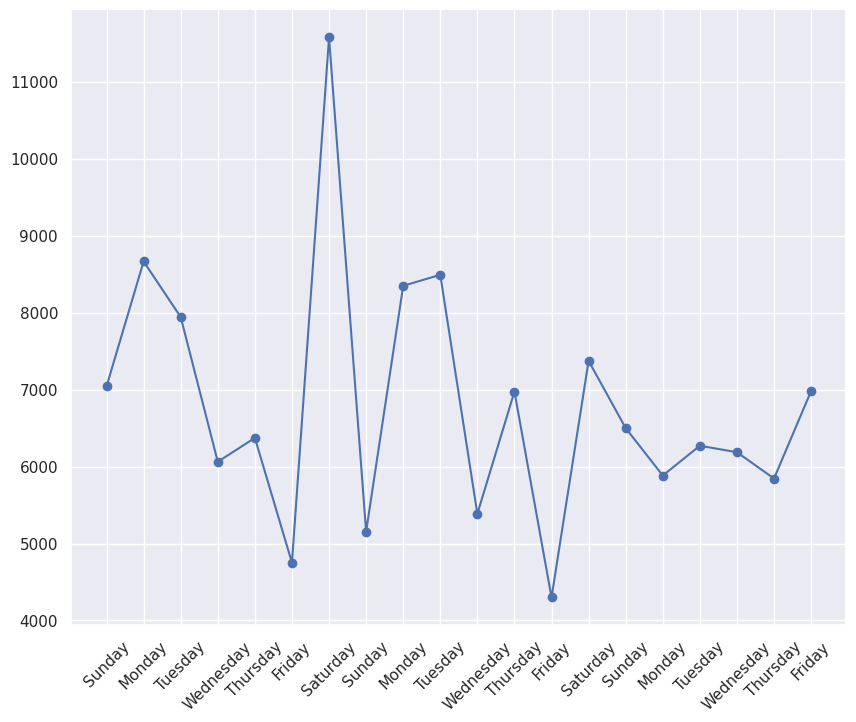

In [ ]:


# #============================================================

# fig, ax = plt.subplots()
# ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
# ax.set_ylabel('Daily Consumption (GWh)')
# ax.set_title('Jan-Feb 2017 Electricity Consumption')
 
# #============================================================
 
# fig, axes = plt.subplots(3, 1, figsize=(7, 6), sharex=True)
# for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
#     sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
#     ax.set_ylabel('GWh')
#     ax.set_title(name)
    
# # Remove the automatic x-axis label from all but the bottom subplot
# if ax != axes[-1]:
#     ax.set_xlabel('')

# #============================================================

# sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption');

In [ ]:
print(sales_merged)

482,157
7,555
98.45731506688863
1.5426849331113714


/tmp/ipykernel_12185/3939706707.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()
/tmp/ipykernel_12185/3939706707.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend()


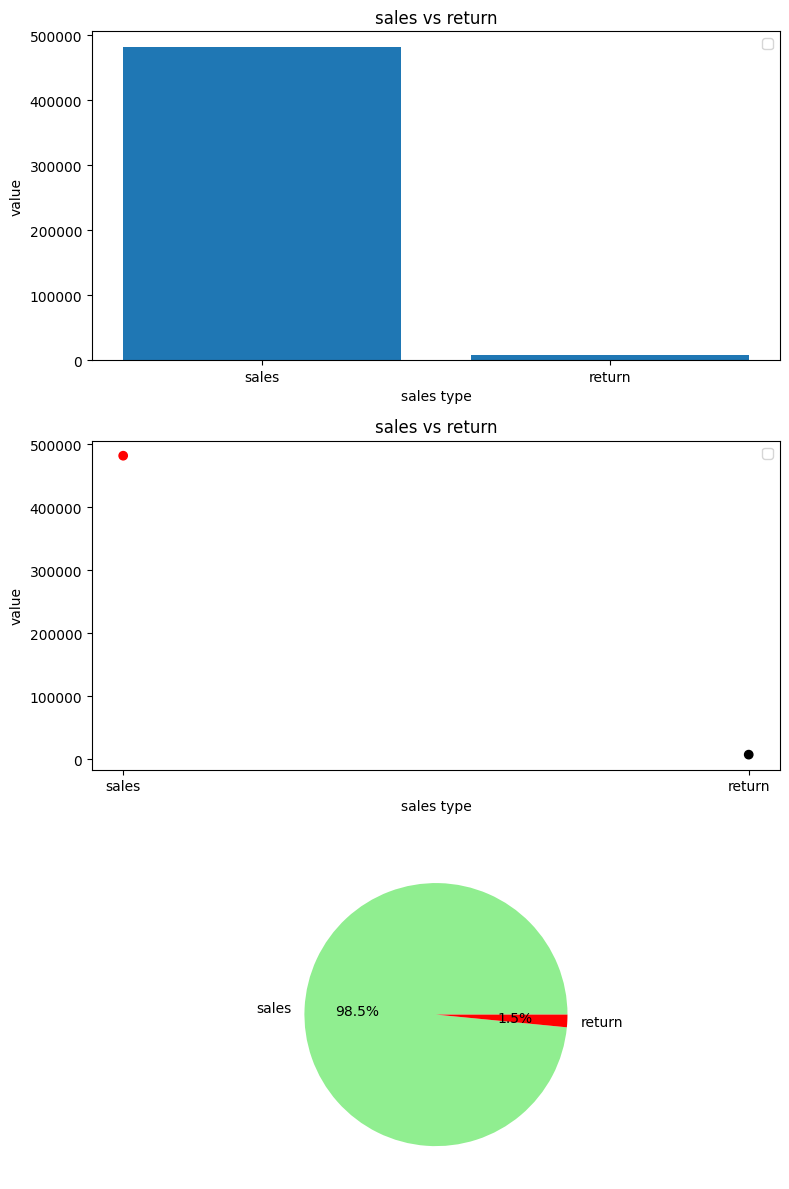

In [4]:
sales =df[df['Trx Type'] == "Sales" ]['Net Value'].sum()
print(f'{sales:,.0f}')
return_sales = abs(df[df['Trx Type'] == "Return" ]['Net Value'].sum())
print(f'{return_sales:,.0f}')

sales_ration  = (sales / (sales + return_sales) )* 100
return_ratio  = (return_sales / (sales + return_sales) )* 100
print(sales_ration)
print(return_ratio)

fig,ax = plt.subplots(3,1,figsize=(8,12))

ax[0].bar(['sales' , 'return'], [sales,return_sales] )
ax[0].set_title('sales vs return')
ax[0].set_xlabel('sales type')
ax[0].set_ylabel('value')
ax[0].legend()


ax[1].scatter(['sales' , 'return'], [sales,return_sales] ,color=['red','black'] )
ax[1].set_title('sales vs return')
ax[1].set_xlabel('sales type')
ax[1].set_ylabel('value')
ax[1].legend()

ax[1].set_title('sales vs return')
ax[2].pie([sales_ration , return_ratio] , labels=['sales' , 'return'] ,colors=['lightgreen' , 'red'] , autopct='%1.1f%%')
plt.tight_layout()
plt.show()

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()



# sales_merged.plot(figsize=(7,4), linewidth=1, fontsize=10)
# plt.xlabel('Month', fontsize=10);


 

 
netValue = df[['Net Value']]
# netValue.rolling(30).mean().plot(figsize=(7,4), linewidth=1, fontsize=10)
# plt.xlabel('Month', fontsize=10);

 
# gym = df[['gym']]
# gym.rolling(12).mean().plot(figsize=(7,4), linewidth=1, fontsize=10)
# plt.xlabel('Year', fontsize=10);


 
# df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
# df_rm.plot(figsize=(7,4), linewidth=1, fontsize=10)
# plt.xlabel('Year', fontsize=10);

 
netValue.diff().plot(figsize=(7,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);


# df.plot(figsize=(7,4), linewidth=1, fontsize=10)
# plt.xlabel('Year', fontsize=10);



df.corr()


# df.diff().plot(figsize=(7,4), linewidth=1, fontsize=10)
# plt.xlabel('Year', fontsize=10);


# df.diff().corr()

# pd.plotting.autocorrelation_plot(diet);






In [8]:
df['Trx Time'].dtypes

dtype('int32')

    Trx Time  Transaction Count
0          0                340
1          1                189
2          2                  3
3          8                  6
4          9                180
5         10                244
6         11                276
7         12                302
8         13                350
9         14                315
10        15                339
11        16                451
12        17                470
13        18                524
14        19                583
15        20                616
16        21                538
17        22                504
18        23                477


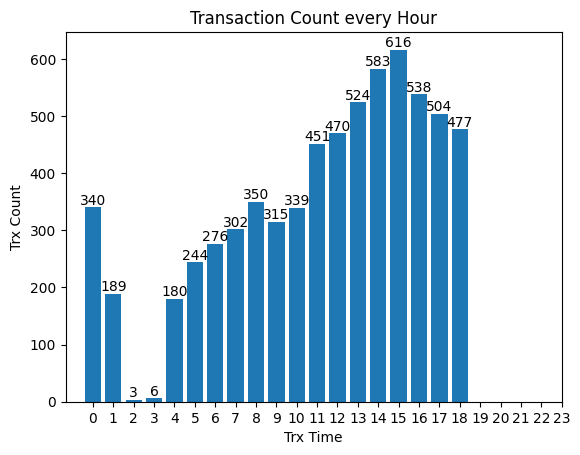

In [26]:
if df['Trx Time'].dtype != np.int32:
    df['Trx Time'] = pd.to_datetime(df['Trx Time'], format="%H:%M:%S").dt.hour
rash_hour = df.groupby('Trx Time').size().reset_index(name='Transaction Count')
sorted_hour = rash_hour.sort_values(by='Trx Time', ascending=True)
print(sorted_hour)
plt.Figure(figsize=(10,8))
plt.bar(sorted_hour.index, sorted_hour['Transaction Count'])
plt.xlabel('Trx Time')
plt.ylabel('Trx Count')
plt.title('Transaction Count every Hour')
# set text on each bar
for i in range(len(sorted_hour['Trx Time'])):
    plt.text(i, sorted_hour['Transaction Count'][i] + 5, f"{sorted_hour['Transaction Count'][i]}", ha='center')
plt.xticks(range(24))
plt.show()

In [ ]:
rash_hour_perstaff = df.groupby(['Trx Date' , 'Trx Time' , 'Staff ID']).size().reset_index(name='Tranaction Count')
# print(rash_hour_perstaff[:30])
pivot_rash_hour_perstaff = rash_hour_perstaff.pivot_table(index='Trx Time' , columns='Staff ID' , values='Tranaction Count' , aggfunc='sum',fill_value=0)

def formate_num(value):
    return f"{value:,.0f}"
    
# formated_pivot_table = pivot_rash_hour_perstaff.map(formate_num)

# print(formated_pivot_table)

plt.figure(figsize=(12,8))
sns.heatmap(pivot_rash_hour_perstaff , annot=True , fmt=',.0f' , cbar_kws={'format': '%.0f'} ,cmap='YlGnBu')
plt.title("pivot_rash_hour_perstaff")

plt.xlabel('staff id')
plt.ylabel('hours ber day')

plt.show()

Staff ID        3611        9174
Trx Time                        
0          55.598086  109.536583
1          52.275340   46.956182
2          38.006667    0.000000
8           0.000000   52.700000
9          57.663207   51.781346
10         78.380692   86.586361
11         83.537905   90.489421
12         53.262731   78.004666
13        100.722947   94.992173
14         78.126726   85.641267
15         47.505952   73.059668
16         66.004415   74.523480
17         58.285724   92.361831
18         59.513869   87.627008
19         58.618968   66.261100
20         74.773715   72.260457
21         60.889838   81.134534
22         60.596373   70.612200
23         62.873926   80.794078


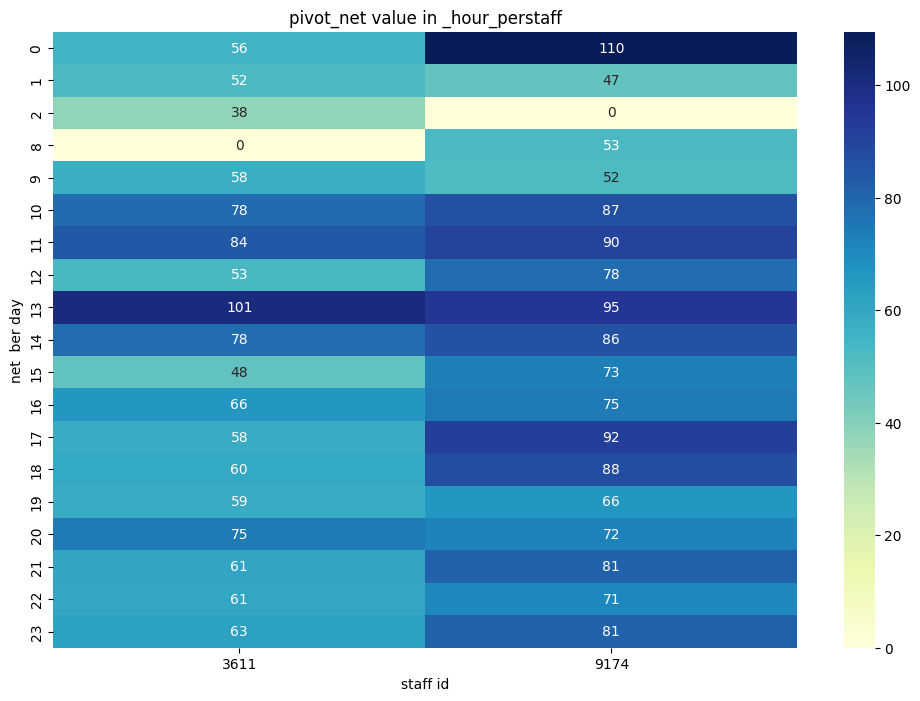

In [10]:
df_filtered = df[df['Staff ID'] !=  3098]

transcion_value_in_hr_berid = df_filtered.groupby(['Trx Date' , 'Trx Time' , 'Staff ID'])['Net Value'].mean().reset_index(name='transcion net')

pivot_table__net_staffid = transcion_value_in_hr_berid.pivot_table(index='Trx Time' , columns='Staff ID' , values='transcion net' ,fill_value=0)
print(pivot_table__net_staffid)
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table__net_staffid , annot=True , cmap='YlGnBu', fmt=',.0f' , cbar_kws={'format': '%.0f'}  )
plt.title("pivot_net value in _hour_perstaff")
plt.xlabel('staff id')
plt.ylabel('net  ber day')

plt.show()

0       9174
1       9174
2       9174
3       3611
4       3611
        ... 
6702    9174
6703    9174
6704    9174
6705    9174
6706    9174
Name: Staff ID, Length: 6702, dtype: int64
